In [7]:
import os
import time
import pycuda.autoinit
from utils.yolo_classes import get_cls_dict
from utils.display import open_window, set_display, show_fps
from utils.visualization import BBoxVisualization
from utils.yolo import TRT_YOLO
import cv2
from matplotlib.pyplot import imshow
%matplotlib inline
import ipywidgets
from IPython.display import display
from jetcam.utils import bgr8_to_jpeg
from jetbot import Robot
from jetcam.csi_camera import CSICamera

camera = CSICamera(width=224, height=224)
trt_yolo = TRT_YOLO ("yolov4-tiny-288", (288, 288), 1)


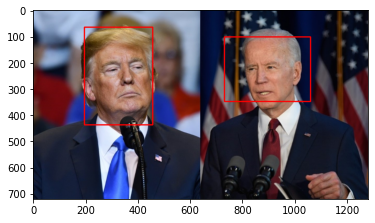

In [8]:
img = cv2.imread('test/test.jpg')
boxes, confs, clss = trt_yolo.detect (img, 0.3)
for i in range(len(clss)):
    cv2.rectangle(img, (boxes[i][0], boxes[i][1]), (boxes[i][2], boxes[i][3]), (0, 0, 255), 3)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imshow(img)

In [27]:
image = camera.read()
print(image.shape)

image_widget = ipywidgets.Image(format="jpeg")
image_widget.value = bgr8_to_jpeg(image)
display (image_widget)

(224, 224, 3)


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

In [28]:
camera.running = True
def update_image (change):
    image = change['new']
    image_widget.value = bgr8_to_jpeg(image)

camera.observe (update_image, names='value')


In [25]:
camera.running = False

(224, 224, 3)


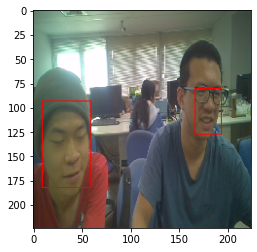

In [41]:
# Import 自走車套件
robot=Robot()
# 驗證鏡頭面

img = camera.value
boxes, confs, clss = trt_yolo.detect (img, 0.25)
height, width,_ = img.shape
print(img.shape)
# 建出物件框
for i in range(len(clss)):
    cv2.rectangle(img, (boxes[i][0], boxes[i][1]), (boxes[i][2], boxes[i][3]), (0, 0, 255), 1)

img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imshow(img)
#display (image)